# manifold graph

In [105]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import normalize
import sys
import imp
from scipy.special import softmax,entr
import pandas as pd
import plot_tools
import backbone
imp.reload(backbone)

<module 'backbone' from '/usr/data/gzy/DGC/backbone.py'>

# KDE

In [1]:
from sklearn.datasets import make_circles
import plot_tools
import plotly.graph_objects as go
import numpy as np

import KDE
import imp
imp.reload(KDE)

<module 'KDE' from '/usr/data/gzy/DGC/KDE.py'>

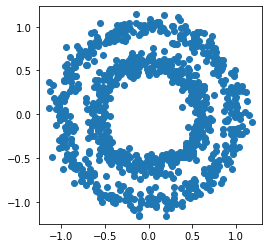

In [2]:
X, Y = make_circles(n_samples=1000, noise=0.07, factor=0.6)
plot_tools.autoPlot(X)

In [7]:
def plot_density(X,P):
    plot_tools.autoPlot(testX,P,continues=True)

    fig = go.Figure()
    fig.add_trace(
                    go.Scatter3d(
                        x=testX[:,0],
                        y=testX[:,1],
                        z=P,
                        mode='markers',
                        marker=dict(
                            size=5,
                            color=P,                # set color to an array/list of desired values
                            colorscale='Viridis',   # choose a colorscale
                            opacity=0.8
                        )
                        ),
    )

    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()

normalize=lambda x:(x-np.min(x))/(np.max(x)-np.min(x))

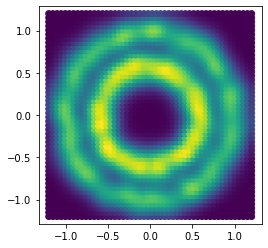

In [12]:
testX=np.meshgrid(np.linspace(-1.2, 1.2, 50),np.linspace(-1.2, 1.2, 50))
testX=np.hstack( [testX[0].reshape(-1,1),testX[1].reshape(-1,1)] )


PD=KDE.Point_Distance(X,30)
D,I=PD.get_DI(testX,30)
P=PD.get_density(D)
plot_density(testX,normalize(P))

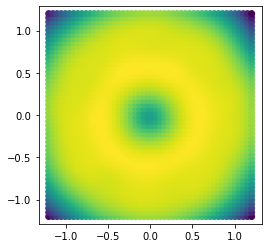

In [9]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=0.156).fit(X)
P2=kde.score_samples(testX)

plot_density(testX,normalize(P2))

# ascending manifold

In [15]:
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()

In [26]:
if not os.path.isfile('pdf_tree_data.npy'):
    np.random.seed(0)
    data = np.hstack(
       [np.random.normal(loc=-4.0, scale=1.0, size=90),
       np.random.normal(loc=-0.5, scale=0.15, size=100),
       np.random.normal(loc=3.5, scale=0.1, size=75)]
    )

    np.save('pdf_tree_data.npy', data)
else:
    data = np.load('pdf_tree_data.npy')

In [53]:
kde = sm.nonparametric.KDEUnivariate(data)
kde.fit()
pdf = kde.density
support = kde.support

merge_levels = [0.041, 0.0765]
merge_xs = [-2.65, 1.5]
mode_levels = [0.091, 0.148, 0.107]
mode_xs = [-4.05, -0.57, 3.475]

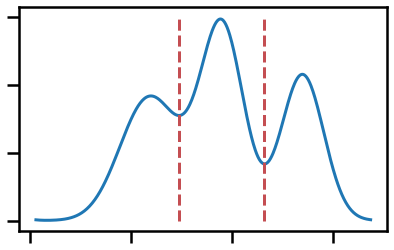

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)

# Vertical branches
ax.plot([-2.6] * 2, [-0, 0.15], c='r',linestyle="--" )
ax.plot([1.6] * 2, [-0, 0.15], c='r',linestyle="--" )

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout()

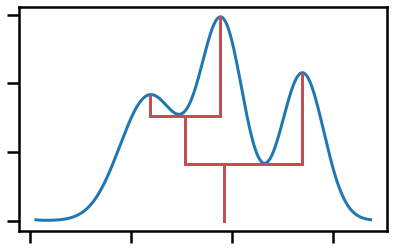

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)

# Vertical branches
ax.plot([mode_xs[0]] * 2, [merge_levels[1], mode_levels[0]], c='r')
ax.plot([mode_xs[1]] * 2, [merge_levels[1], mode_levels[1]], c='r')
ax.plot([mode_xs[2]] * 2, [merge_levels[0], mode_levels[2]], c='r')
ax.plot([np.mean(mode_xs[:2])] * 2, [merge_levels[0], merge_levels[1]], c='r')
ax.plot([np.mean(mode_xs)] * 2, [0.0, merge_levels[0]], c='r')

# Horizontal connectors
ax.plot([mode_xs[0], mode_xs[1]], [merge_levels[1]] * 2, c='r')
ax.plot([np.mean(mode_xs[:2]), mode_xs[2]], [merge_levels[0]] * 2, c='r')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout()

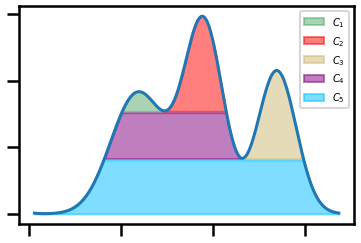

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)

# First mode
mode_selection = (pdf > merge_levels[1]) & (support < merge_xs[0])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[1] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='g', label="$C_1$")

# Second mode
mode_selection = (pdf > merge_levels[1]) & (support > merge_xs[0]) & (support < merge_xs[1])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[1] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='red', label="$C_2$")

# Third mode
mode_selection = (pdf > merge_levels[0]) & (support > merge_xs[1])
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = (merge_levels[0] + 0.0005) * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='y', label="$C_3$")

# Merged mode
mode_selection = (pdf > merge_levels[0]) & (support < merge_xs[1])
xs = support[mode_selection]
ys1 = np.min(np.vstack([pdf[mode_selection], 
                        (merge_levels[1] - 0.0005) * np.ones(xs.shape[0])]), axis=0)
ys2 = (merge_levels[0] + 0.0005) * np.ones(xs.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='purple', label="$C_4$")

# Final mode
xs = support
ys1 = np.min(np.vstack([pdf, 
                        (merge_levels[0] - 0.0005) * np.ones(xs.shape[0])]), axis=0)

ax.fill_between(xs, ys1, 0, alpha=0.5, color='deepskyblue', label="$C_5$")
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False);
plt.legend(loc='best', fontsize=10)
plt.savefig('excess_of_mass.png')

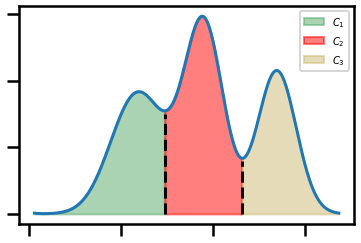

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(support, pdf)

# First mode
mode_selection = support < -2.6
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = 0 * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='g', label="$C_1$")

# Second mode
mode_selection = (support > -2.6) & (support < 1.6)
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = 0 * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='red', label="$C_2$")

# Third mode
mode_selection = support > 1.6
xs = support[mode_selection]
ys1 = pdf[mode_selection]
ys2 = 0 * np.ones(ys1.shape[0])

ax.fill_between(xs, ys1, ys2, alpha=0.5, color='y', label="$C_3$")

ax.plot([-2.6] * 2, [-0, 0.075], c='black',linestyle="--" )
ax.plot([1.6] * 2, [-0, 0.04], c='black',linestyle="--" )

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False);
plt.legend(loc='best', fontsize=10)